## Data

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA

In [2]:
label=['signal','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']
feature=['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

df=pd.read_csv('Data/SUSY.csv',names=label,nrows=33200) # 5000000

df.to_csv('Data/SUSY_cut.csv', index = False)

df.head(n=5)

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [3]:
print(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33200 entries, 0 to 33199
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   signal                    33200 non-null  float64
 1   lepton 1 pT               33200 non-null  float64
 2   lepton 1 eta              33200 non-null  float64
 3   lepton 1 phi              33200 non-null  float64
 4   lepton 2 pT               33200 non-null  float64
 5   lepton 2 eta              33200 non-null  float64
 6   lepton 2 phi              33200 non-null  float64
 7   missing energy magnitude  33200 non-null  float64
 8   missing energy phi        33200 non-null  float64
 9   MET_rel                   33200 non-null  float64
 10  axial MET                 33200 non-null  float64
 11  M_R                       33200 non-null  float64
 12  M_TR_2                    33200 non-null  float64
 13  R                         33200 non-null  float64
 14  MT2   

In [4]:
df.describe()

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,33200.000000,3.320000e+04
mean,0.457620,0.999517,-0.005942,-0.004975,0.998125,-0.006459,0.003617,0.996404,-0.008198,0.994552,0.002069,1.000071,0.997245,0.997410,0.996647,0.998827,0.997070,0.997576,2.248595e-01
std,0.498208,0.682530,1.002057,1.003391,0.649761,1.000327,1.002085,0.874079,1.000765,0.880105,1.004710,0.633031,0.581531,0.469005,0.853957,0.624782,0.619304,0.435845,1.968465e-01
min,0.000000,0.262125,-2.102305,-1.734744,0.428590,-2.059059,-1.733849,0.002086,-1.727112,0.000004,-9.033109,0.275981,0.015300,0.021635,0.000000,0.090059,0.004726,0.000242,3.520310e-07
25%,0.000000,0.560263,-0.762907,-0.875841,0.595780,-0.774736,-0.866487,0.479800,-0.871162,0.368403,-0.488167,0.586778,0.616643,0.649900,0.174026,0.595885,0.514457,0.689762,6.859393e-02
50%,0.000000,0.788076,-0.006806,-0.002656,0.797873,-0.003489,0.007708,0.775790,-0.025807,0.796503,-0.076570,0.824695,0.876367,0.932016,0.899218,0.832885,0.911827,1.090510,1.687800e-01
75%,1.000000,1.206356,0.753596,0.862516,1.161215,0.761417,0.861617,1.196296,0.855291,1.367312,0.344516,1.211787,1.217588,1.277586,1.607582,1.204129,1.382939,1.366677,3.284920e-01
max,1.000000,9.713083,2.101403,1.734342,10.212904,2.059194,1.734349,13.680408,1.740529,11.626125,13.375183,13.969072,10.134218,5.335464,8.244093,14.024200,6.189984,1.591624,9.758370e-01


<IPython.core.display.Javascript object>


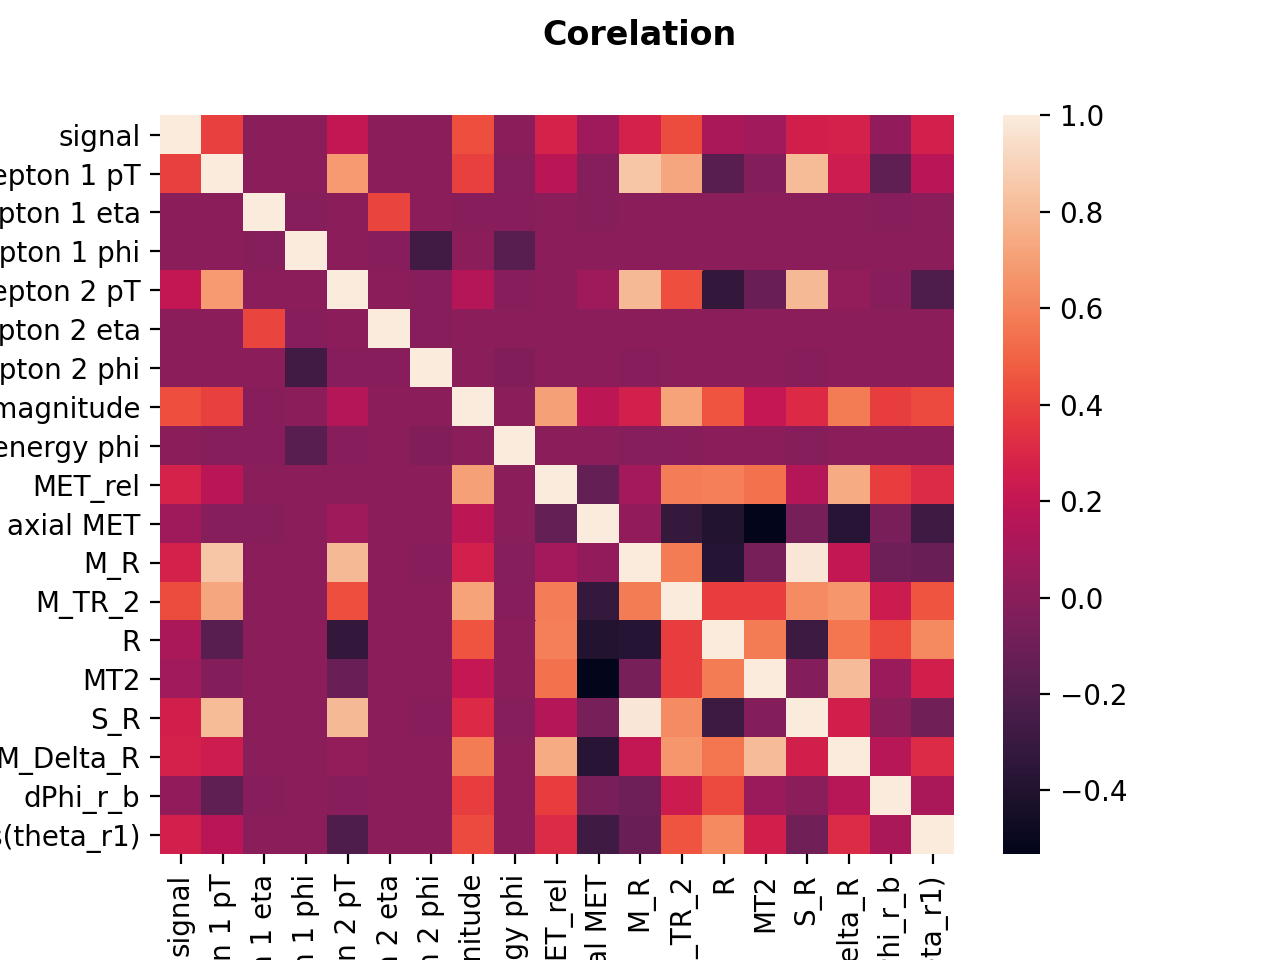

In [5]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)
plt.suptitle("Corelation",fontweight="bold")
plt.show()

In [6]:
corr_matrix['signal'].sort_values(ascending=False)

signal                      1.000000
missing energy magnitude    0.436339
M_TR_2                      0.426903
lepton 1 pT                 0.395337
MET_rel                     0.281368
M_Delta_R                   0.274817
M_R                         0.270099
cos(theta_r1)               0.268845
S_R                         0.260803
lepton 2 pT                 0.201446
R                           0.110042
MT2                         0.078780
axial MET                   0.074930
dPhi_r_b                    0.029286
lepton 1 phi                0.001631
lepton 2 eta                0.000822
lepton 2 phi               -0.000540
missing energy phi         -0.003790
lepton 1 eta               -0.004024
Name: signal, dtype: float64

In [7]:
particle=df[df['signal']==1]
background=df[df['signal']==0]

<IPython.core.display.Javascript object>


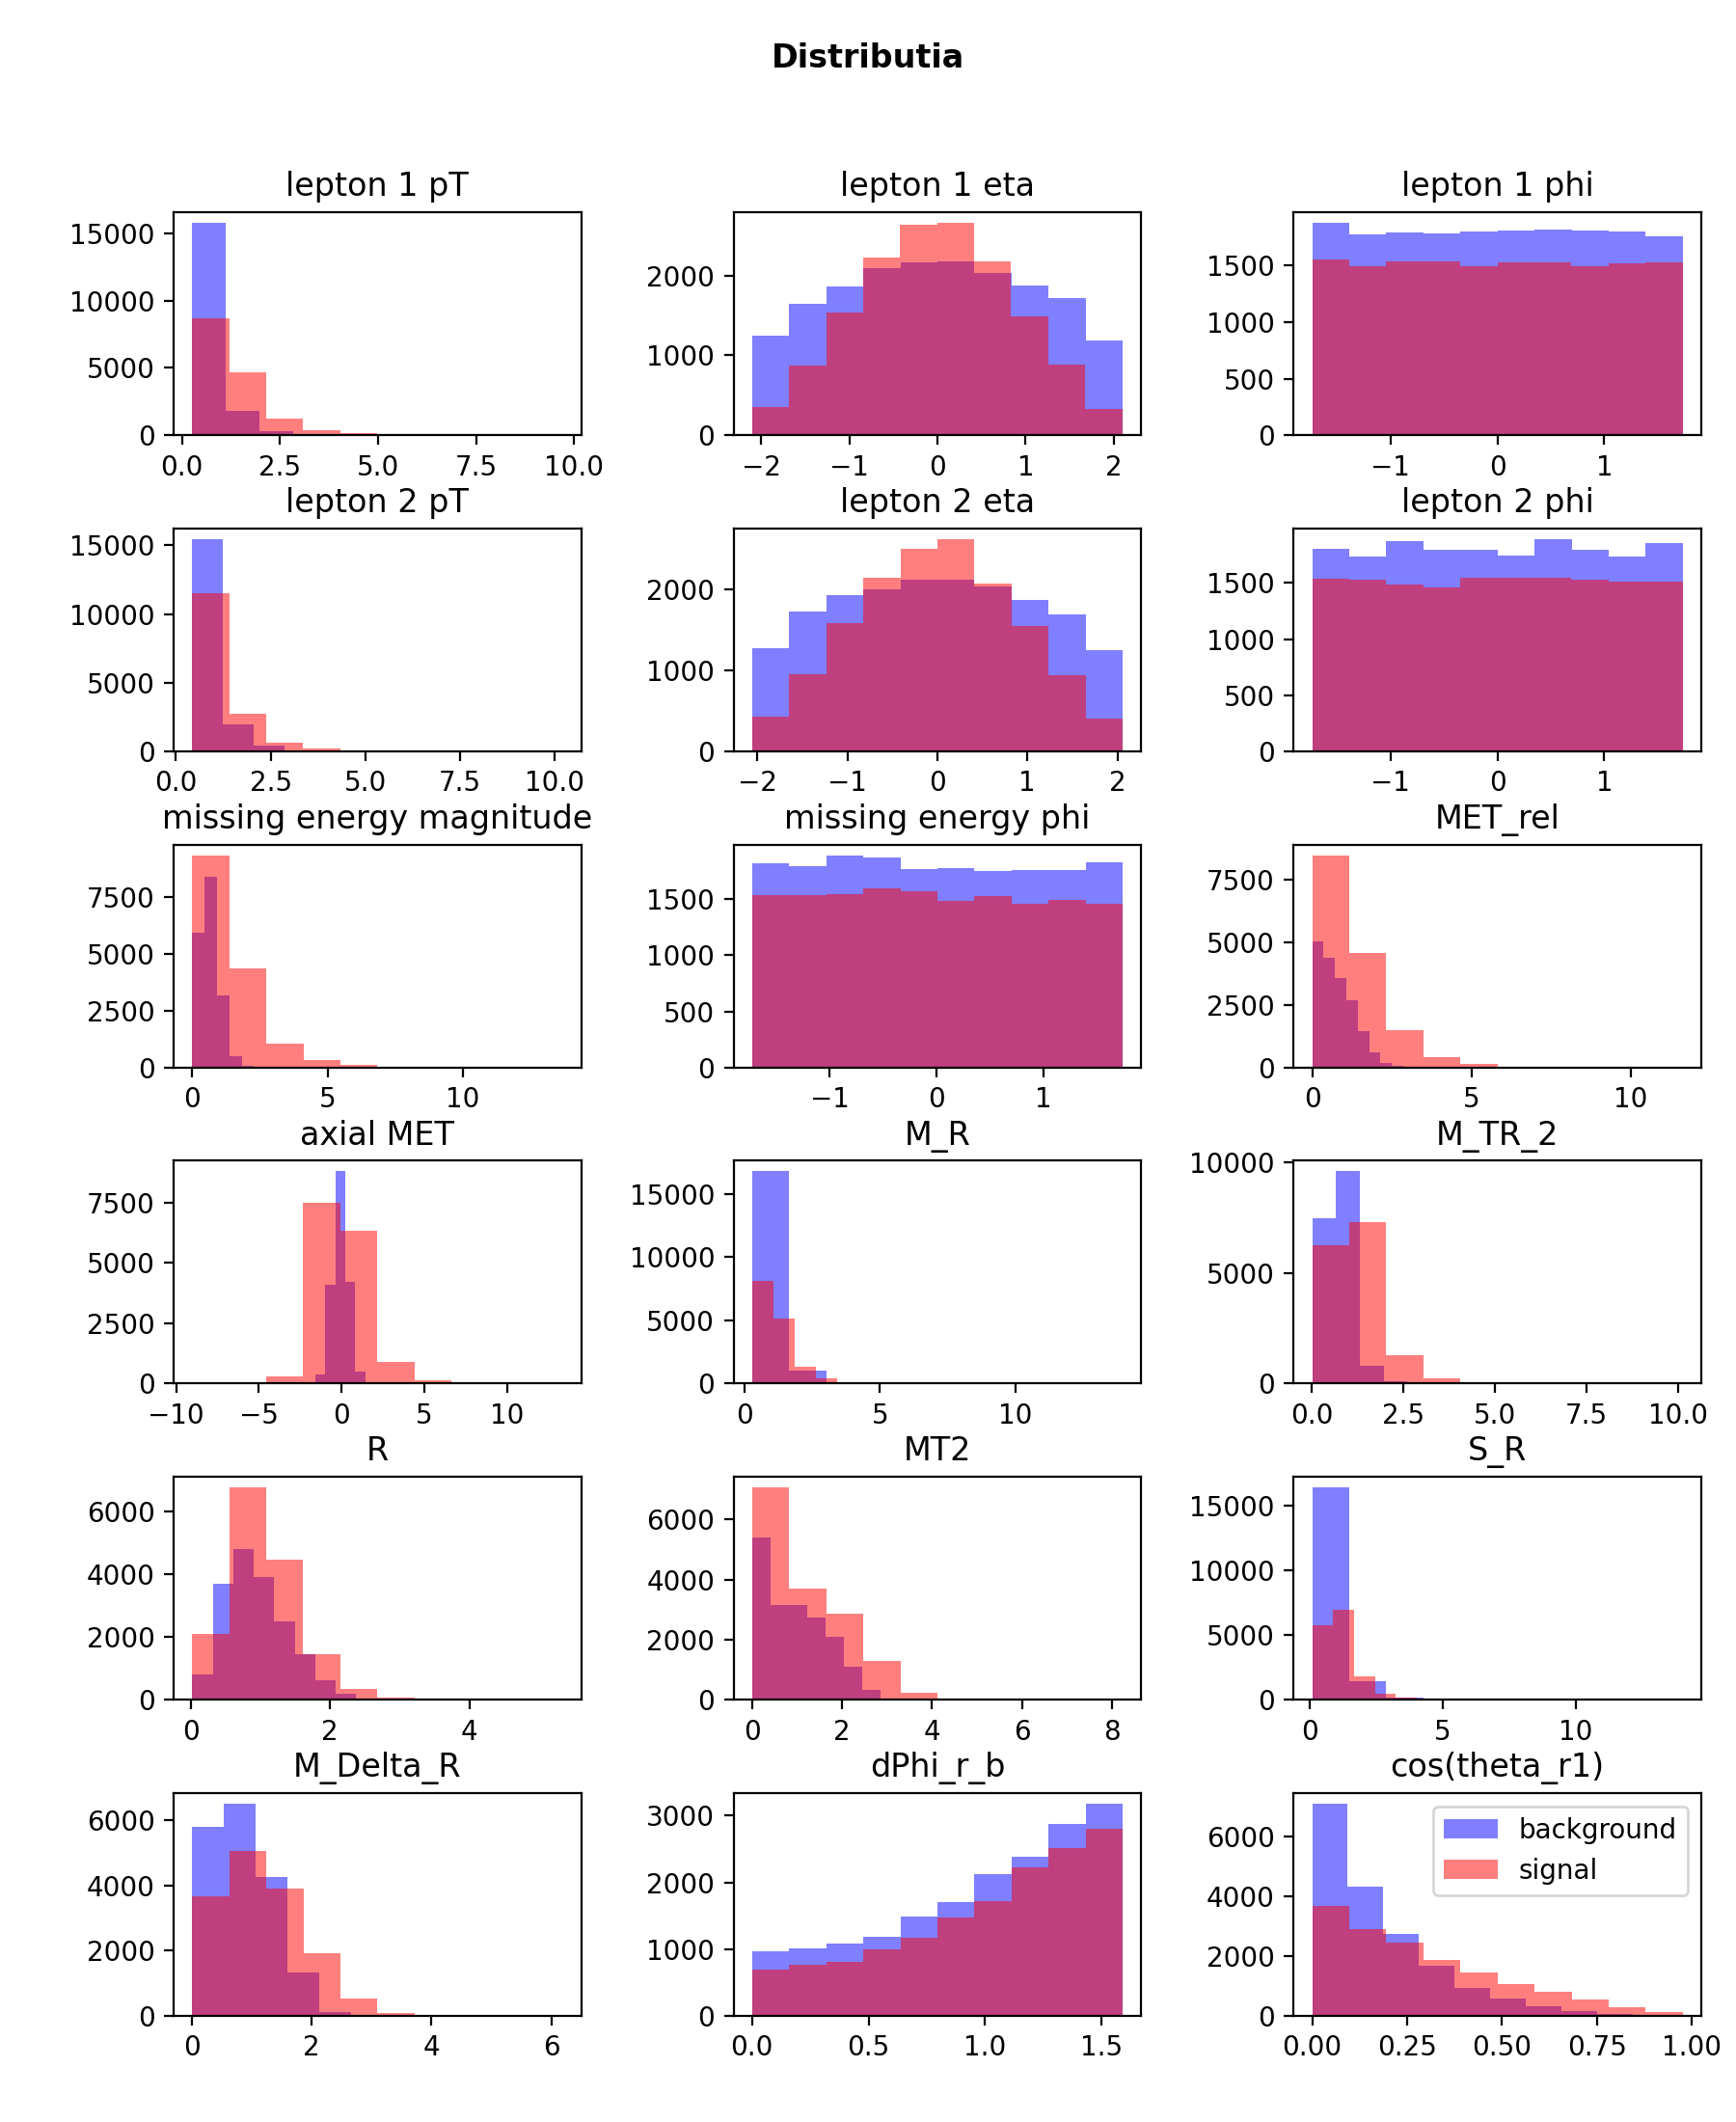

In [8]:
# histograms 
# 18 histogram
nr_row=3000
i=0

fig, ax = plt.subplots(6,3,figsize=(9, 11))
fig.tight_layout(pad=1.7)
plt.subplots_adjust(bottom=0.05, right=0.98,left=0.1, top=0.9)
for i in range(18):
    ax[int(i/3),int(i%3)].hist(background[feature[i]], alpha=0.5,color='b', label='background')
    ax[int(i/3),int(i%3)].hist(particle[feature[i]],  alpha=0.5,color='r', label='signal')
    ax[int(i/3),int(i%3)].title.set_text(feature[i])
    
fig.suptitle("Distributia",fontweight="bold")
plt.legend(loc='upper right',)
plt.show()

#fig.savefig("",bbox_inches='tight',dpi=dpiVal)

<IPython.core.display.Javascript object>


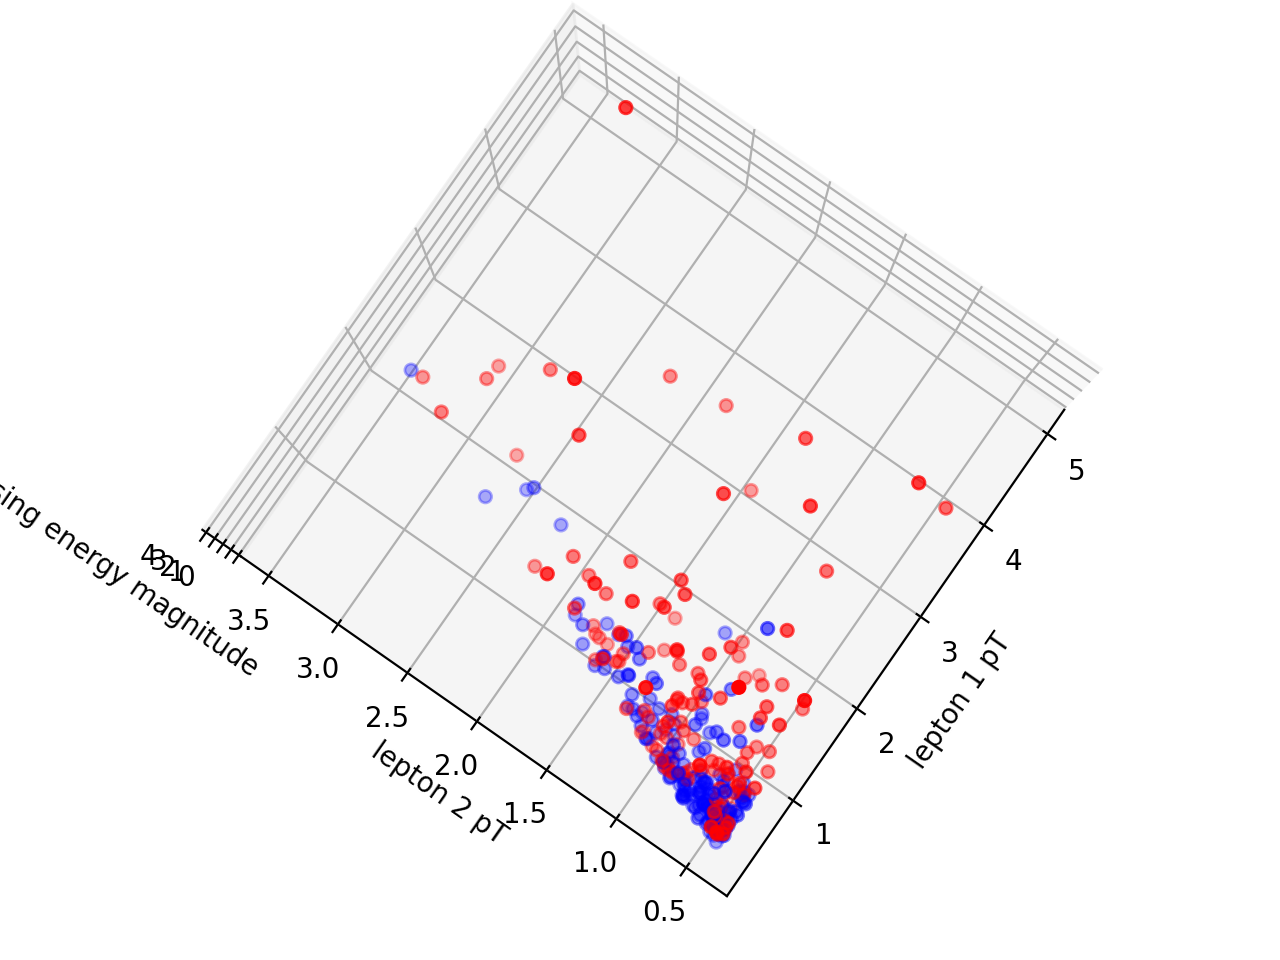

In [13]:

nr_row=300
feature_l1=df['lepton 1 pT'][:nr_row]
feature_l2=df['lepton 2 pT'][:nr_row]
feature_mem=df['missing energy magnitude'][:nr_row]

color=['r' if df['signal'][i]==1  else 'b' for i in range(nr_row)]



fig1=plt.figure()


ax1=Axes3D(fig1)
ax1.scatter(feature_l1,feature_l2,feature_mem,color=color)
ax1.set_xlabel('lepton 1 pT')
ax1.set_ylabel('lepton 2 pT')
ax1.set_zlabel('missing energy magnitude')


plt.show()

<IPython.core.display.Javascript object>


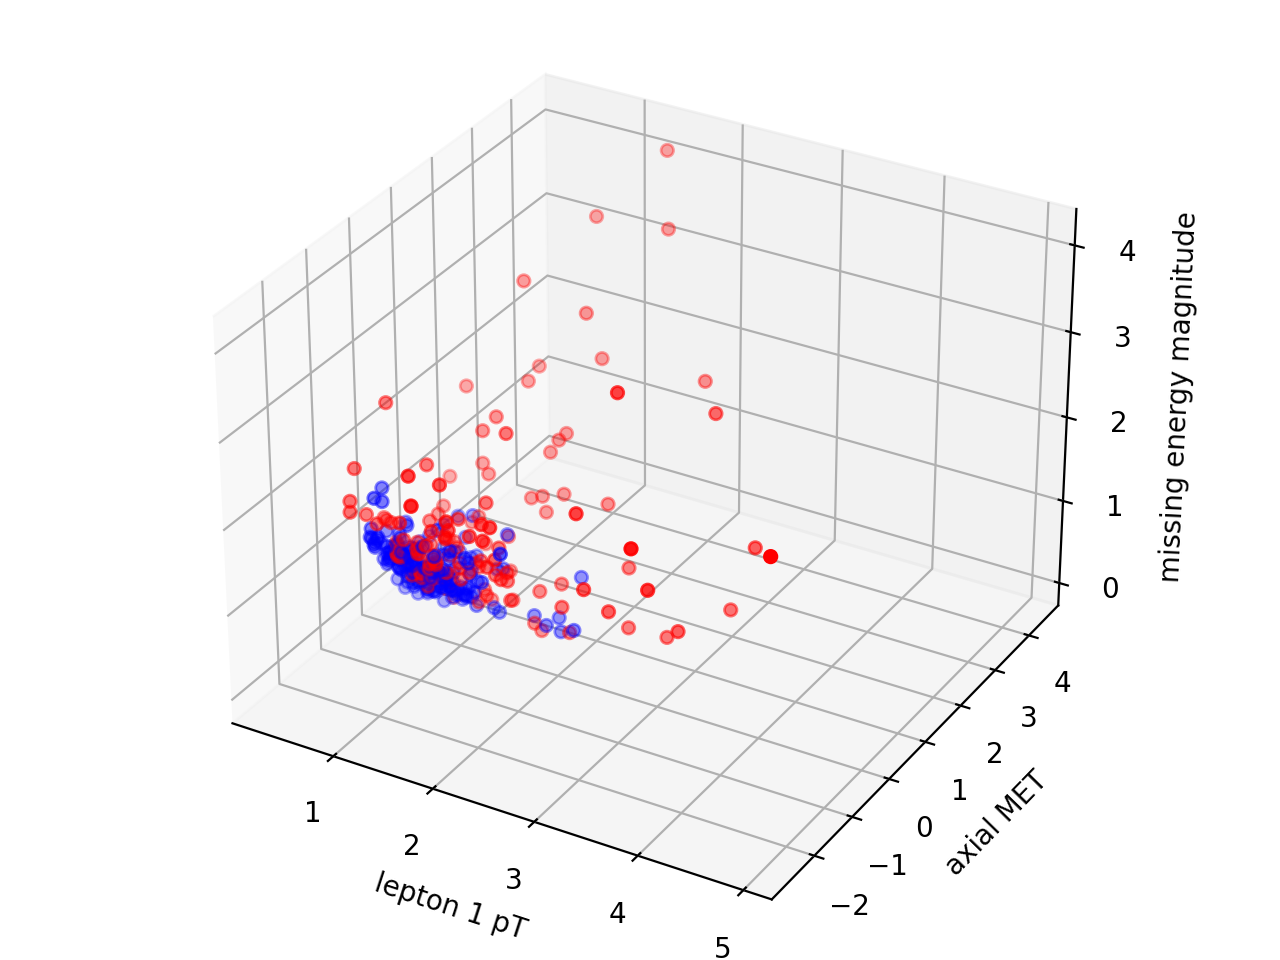

In [10]:
nr_row=300
feature_ax_meT=df['axial MET'][:nr_row]

fig1=plt.figure()


ax1=Axes3D(fig1)
ax1.scatter(feature_l1,feature_ax_meT,feature_mem,color=color)
ax1.set_xlabel('lepton 1 pT')
ax1.set_ylabel('axial MET')
ax1.set_zlabel('missing energy magnitude')


plt.show()

## PCA

In [11]:
features_label=['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']
fetures=df[features_label]
scalar=StandardScaler()
scalar.fit(fetures)
scale_data=scalar.transform(fetures)

new_futures=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']
pca=PCA(n_components=6)
pca.fit(scale_data)
X_pca=pca.transform(scale_data)
X_pca=pd.DataFrame(X_pca, columns=new_futures)
print(X_pca.shape)
X_pca.head(5)

(33200, 6)


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,0.288914,1.811352,-0.182221,-0.925522,-1.376667,0.299600
1,-1.045939,1.082292,4.201539,1.157734,1.454510,-1.937454
2,0.473139,-2.452082,0.076952,-1.245939,0.287359,0.829840
3,1.420898,-2.736261,0.584493,0.054912,-0.355436,1.633364
4,-0.926032,1.934374,1.736310,-0.450205,0.765651,-0.638756


<IPython.core.display.Javascript object>


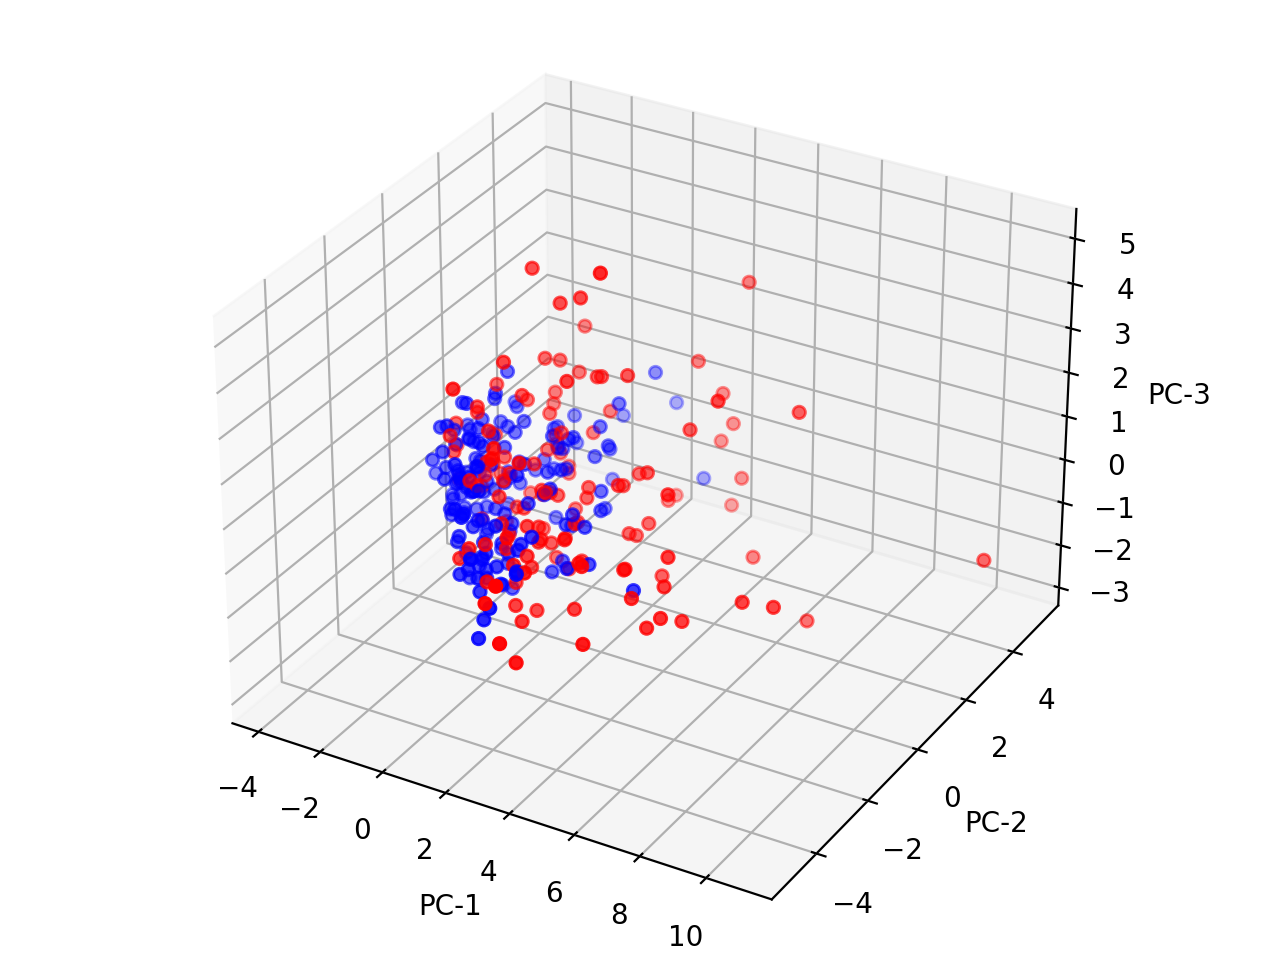

<IPython.core.display.Javascript object>


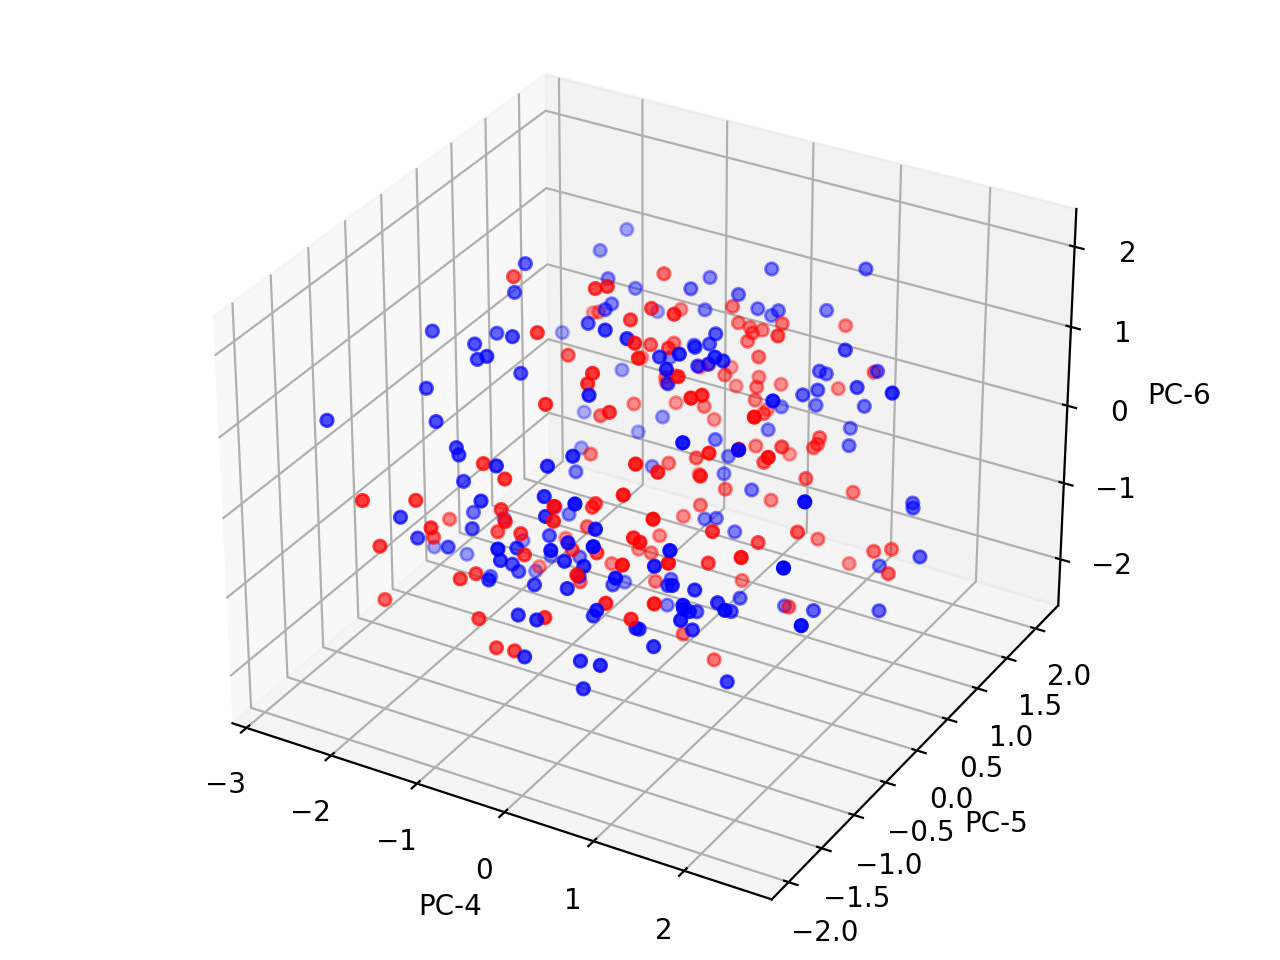

In [12]:
nr_row=300
color=['r' if df['signal'][i]==1  else 'b' for i in range(nr_row)]
future_1=X_pca['PC-1'][:nr_row]
future_2=X_pca['PC-2'][:nr_row]
future_3=X_pca['PC-3'][:nr_row]
future_4=X_pca['PC-4'][:nr_row]
future_5=X_pca['PC-5'][:nr_row]
future_6=X_pca['PC-6'][:nr_row]


fig1=plt.figure()
fig2=plt.figure()

ax1=Axes3D(fig1)
ax1.scatter(future_1,future_2,future_3,color=color)
ax1.set_xlabel('PC-1')
ax1.set_ylabel('PC-2')
ax1.set_zlabel('PC-3')

ax2=Axes3D(fig2)
ax2.scatter(future_4,future_5,future_6,color=color)
ax2.set_xlabel('PC-4')
ax2.set_ylabel('PC-5')
ax2.set_zlabel('PC-6')

plt.show()

In [ ]:
Variance

## References 

In [ ]:
[]   SUSY data set    https://archive.ics.uci.edu/ml/datasets/SUSY
[]   arXiv:1402.4735  -https://arxiv.org/abs/1402.4735
[]   https://arxiv.org/abs/2002.09935